MEMBERS:
Isha Pathania (ipathan)
Naveen Srinivasa (njsriniv)
Shreya Ramakanth (sramaka)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import math
import time
from scipy import ndimage

In [2]:
def blob_detection(image_name):
    START = time.time()
    img = cv2.imread('TestImages4Project/'+image_name, 0)  #Reading as gray image
    img1 = cv2.imread('TestImages4Project/'+image_name)
    img = img/255
    print('Image shape : ',img.shape)
    
    plt.imshow(img, cmap = 'gray')
    plt.show()
    
    #Calculating the sigma values
    def calcSigma(no_s,k,s):
        sigma = []
        for i in range(no_s):
            sigma1 = s*(k**i)
            sigma.append(sigma1)
        h = [round(i*6) for i in sigma]
        for i in range(len(h)):
            if h[i]%2 == 0:
                h[i] = h[i]+1
        return sigma,h
    
    #Calculating LOG scale space
    def calcLoG(k,sigma,no_s,size):
        LoG = []
        for i in range(no_s):
            LoG1 = np.zeros((size[i],size[i]))
            r1 = int(-(math.floor(size[i]/2)))
            r2 = int(math.floor(size[i]/2))
            for x in range(r1,r2+1):
                for y in range(r1,r2+1):
                    LoG1[x+r2,y+r2] = (-1/(math.pi*(sigma[i]**2)))*(1-(((x**2)+(y**2))/(2*(sigma[i]**2))))*np.exp(-((x**2)+(y**2))/(2*(sigma[i]**2)))
            LoG.append(LoG1)
        return LoG

    #Filtering the image with scale normalized Laplacian at current scale 
    def convPadded(image, Filter,no_s,size):
        #start = time.time()
        row = image.shape[0]
        col = image.shape[1]
        convout = []
        for i in range(no_s):
            Filter[i] = np.flipud(np.fliplr(Filter[i]))  
            out = np.zeros_like(image)  
            r = int(math.floor(size[i]/2))+1
            #Modified the padding and convolution functions from project01 according to the application
            padded = np.zeros((row + size[i]+1, col + size[i]+1))   
            padded[r:-r, r:-r] = image
            for x in range(row): 
                for y in range(col):
                    out[x,y]=(Filter[i]*padded[x:x+size[i],y:y+size[i]]).sum()  
            convout.append(out)
        end = time.time()
        #print('Time taken for convolution : ', end-start)
        return convout

    def max_supression(img1,scale_space, sigma, level,threshold_factor):
        max_scale_space = []
        for convout in scale_space:
            max_scale_space.append(np.copy(convout))
        mask = [0]*(level)
        index = [(1, 0), (-1, 0), (0, 1), (0, -1), 
                 (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for i in range(0,level):
            mask[i]=int(np.ceil(np.sqrt(2)*sigma[i]))
        size = np.shape(scale_space[0])

        def check(l):
            return all(scale_space[l][i + dx, j + dy] < scale_space[k][i, j] 
                       for dx, dy in index 
                       if  0<= i + dx < size[0] and 0<= j + dy <size[1])

        blob_location =[]
        for k in range(0,level):
            max_scale_space[k][:mask[k],:mask[k]] = 0
            max_scale_space[k][-mask[k]:,-mask[k]:] = 0
            for i in range(mask[k]+1,size[0]-mask[k]-1):
                for j in range(mask[k]+1,size[1]-mask[k]-1):
                    if scale_space[k][i, j] < threshold_factor:
                        continue
                    c_max = check(k)
                    l_max = u_max = True
                    if k - 1 >= 0:
                        l_max = check(k - 1) and \
                        scale_space[k - 1][i, j] < scale_space[k][i,j]
                    if k + 1 < level:
                        u_max = check(k + 1) and \
                        scale_space[k + 1][i, j] < scale_space[k][i, j]
                    if c_max and l_max and u_max:
                        max_scale_space[k][i, j] = 1
                        blob_location.append((i,j,k))
        for center in blob_location:
            radius = int(np.ceil(np.sqrt(2)*sigma[center[2]])) 
            cv2.circle(img1,(center[1],center[0]),radius, (0,0,255))
        no_of_blobs=len(blob_location)
        print("Number of Blobs=", no_of_blobs)
        return img1


    no_s = 15   #Laplacian space size
    k = 1.24     #Constant multiplier
    s = 1.15    #Starting sigma value
    threshold = 0.01    #threshold for detecting a blob 

    sigma,h = calcSigma(no_s,k,s)
    LoG = calcLoG(k,sigma,no_s,h)

    
#     for i in range(no_s):
#         #print(np.sum(LoG[i]))
#         print(LoG[i].shape)
#         #plt.imshow(LoG[i])
#         plt.show()
    
    convout = convPadded(img,LoG,no_s,h)
    
    #Squaring the Laplacian response
    print("Filtered Images")
    for i in range(no_s):
        convout[i] = np.square(convout[i])
        print(convout[i].shape)
        plt.imshow(convout[i],cmap="gray")
        plt.show()

        
    img1 = max_supression(img1,convout,sigma,no_s,threshold)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(img1_rgb)
    plt.show()
    cv2.imwrite('ResultImages/'+image_name+'-blobs.png',img1)
    print('Time taken to generate an image with blobs = ', time.time() - START, 'sec')

Image shape :  (539, 1500)


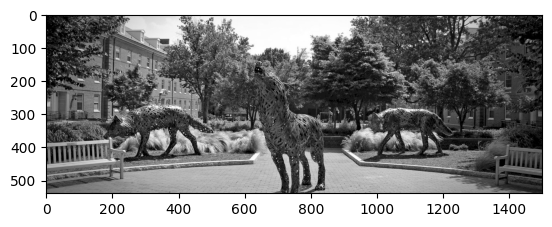

Filtered Images
(539, 1500)


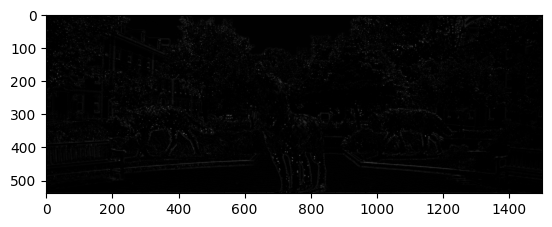

(539, 1500)


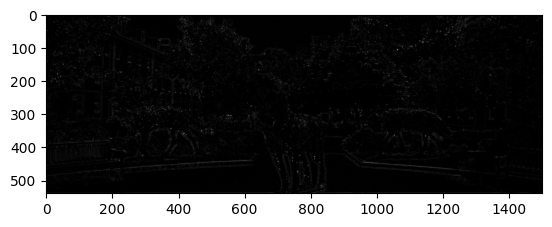

(539, 1500)


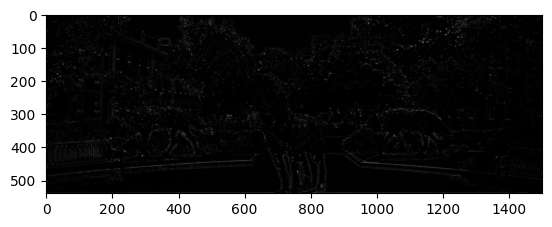

(539, 1500)


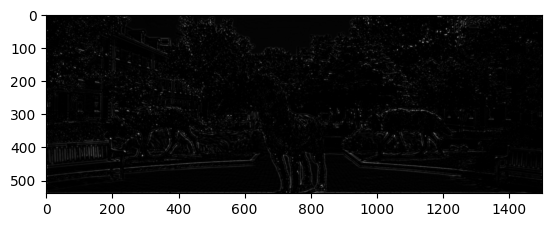

(539, 1500)


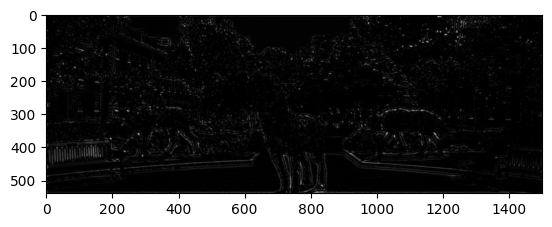

(539, 1500)


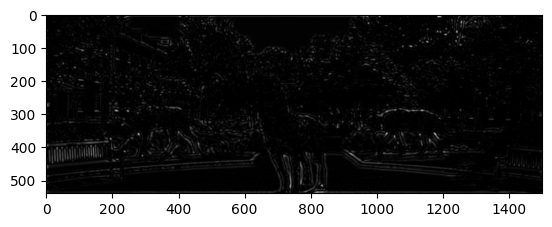

(539, 1500)


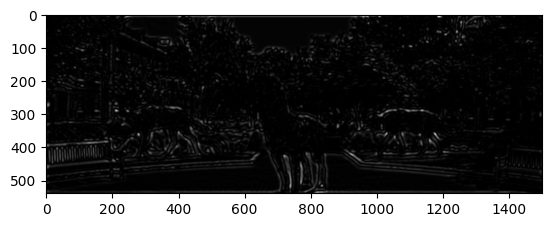

(539, 1500)


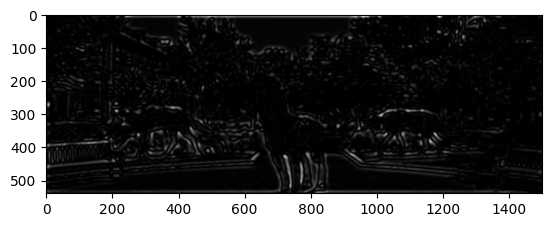

(539, 1500)


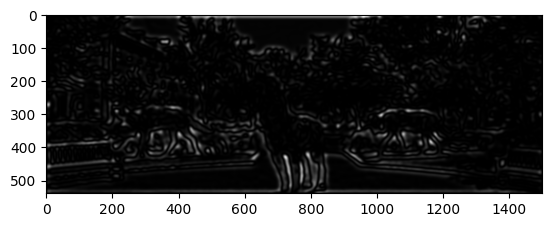

(539, 1500)


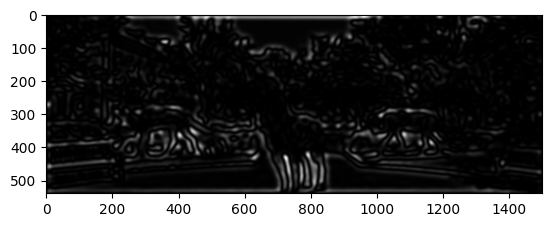

(539, 1500)


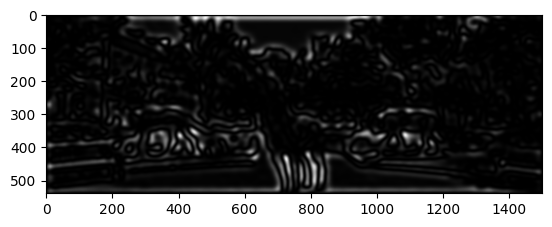

(539, 1500)


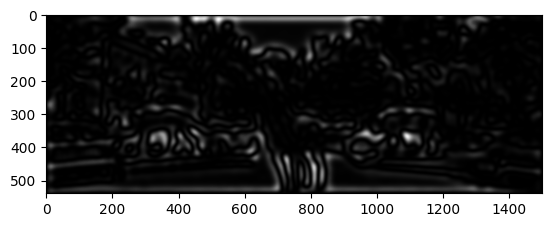

(539, 1500)


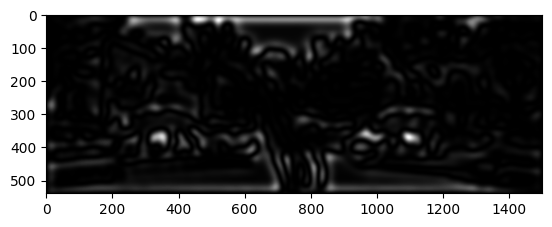

(539, 1500)


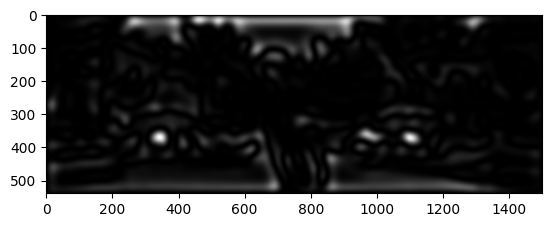

(539, 1500)


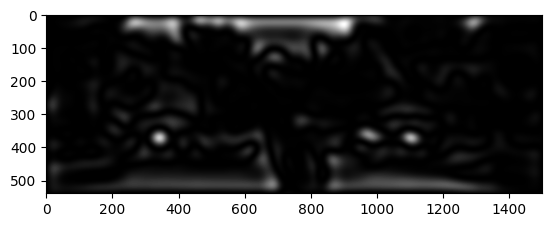

Number of Blobs= 17869


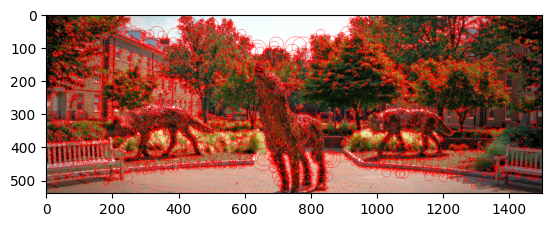

Time taken to generate an image with blobs =  138.7634072303772 sec


In [4]:
#Place the images in the TestImages4Project folder and enter the image name in the below function
#The result images are stored in the ResultImages folder
blob_detection('wolves.png')